# Stat 628 Module2 
Wednesday Group 3: By Shuyi QU, Xiawei Wang, Yiqiao Zhang

### Part 1 Introduction
To achieve the goal for Yelp data analysis project of precisely predicting the ratings based on customers’ reviews and other information, we select word features that have large frequency and vary among different stars, then come up with models based on linear support vector machine, long-short term memory network and other methods.

### Part 2 Background Information
Nowadays, Yelp is killing people’s referral. Online reviews and ratings influence customers’ choice of restaurants. To identifying and categorizing opinions expressed in comments, especially in order to determine whether the customers’ attitude towards the target business, sentiment analysis has long been introduced for topics of natural language problem. Although it’s easy for humans to understand the sentiment behind reviews, machines are having difficulty to extract attitudes behind words. That’s exactly the key point we need to overcome in Yelp data analysis.

### Part 3 Data Pretreatment
We first transform data into easier version. Since the categories are not so informationative and location information is not included in the test data set. We exclude those features for model construction.
Then for variable text, we first remove stop words which do not show significant l1 norm difference of frequency/occurrence among stars. Next part is negation transformation. Negation words like “not” , “never” and phrases occur in reviews, either express a negative attitude itself or appear as a part of idioms, the latter may not include negative meaning at all. Tokenizing texts into bigrams and trigrams help us find common 2-word and 3-word idioms with negation words in them. In order to eliminate the influence of false negation words in common idioms we found, we set a criterion: if a negation word appears as a part of a idiom, leave it alone; else, attach “not” in front of every words after that in the same sentence, and delete the negation word itself in case of duplicate negative meaning, eg: “don’t like”-> “notlike”. Hence, we have our cleaned text.

### Part 4 Feature Selection
For model training purpose, a design matrix is needed, which records the frequency/occurrence of feature words that have effect on the ratings of text. Using cleaned reformatted text data which is merged by the cleaned words, bi-words and punctuations, we develop the matrix in two ways, one based on frequency of words, the other based on occurrence. Take frequency here as an example. We want unigrams and bigrams that are highly used and show different trend among different stars. Two criteria are applied here: sum of average frequency and L1-norm of frequency difference among star rates, indicating the frequency of one word or idiom in a sentence and trend among star rates respectively: 
\begin{equation*}
\sum_{i=1}^5 occur(i)
\end{equation*}      \begin{equation*}
\left( \sum_{i=1}^5 \sum_{j=i+1}^5 |occur(i) - occur(j)|\right) / \sum_{i=1}^5 occur(i)
\end{equation*}
Intersection of unigrams satisfying both criteria are selected as our model features, the same for  bigrams. Noticing that some punctuations may also carry sentiment in restaurant reviews, we include “?”, “!”, “*” and “$” as well. Thus we get our features, which are columns in the design matrix. Each row in the design matrix is our cleaned text. For matrix based on frequency,  each entry is frequency of the feature shown in the text. For matrix based on occurence, each entry is either 0 or 1, meaning whether or not the feature has shown in the corresponding cleaned text.

### Part 5 Model motivation and statements of models
A support vector machine constructs a hyperplane so that the distance from which to the nearest data point on each side is maximized. It is helpful in text classification as their application can significantly reduce the need for labeled training instances in both the standard inductive and transductive settings. Also, svm with linear kernel has relatively small time complexity compared with other machine learn methods. LASSO is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces. LSTMs were developed to deal with the exploding and vanishing gradient problem when training traditional RNNs. An LSTM is well-suited to classify, process and predict time series given time lags of unknown size and duration between important events.

### Part 6 Model Summary and interpretation
Support Vector Machine: 
After applying the model, since words with higher absolute coefficients play more important roles in classification, we plot top positive and negative influential features under each star rate. Y-axis is their coefficients.

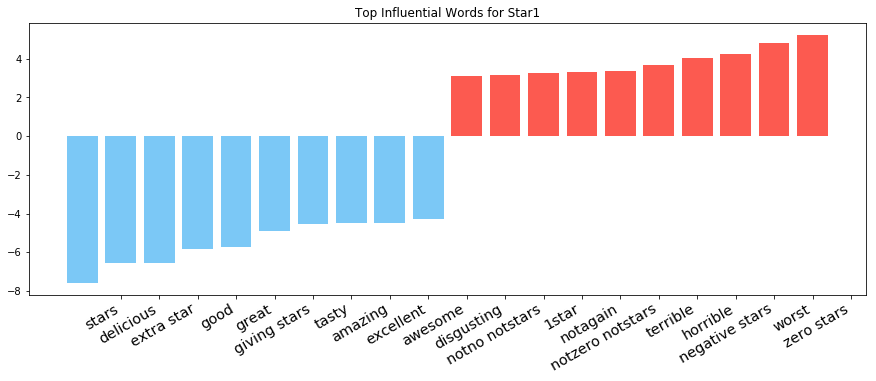

In [66]:
from IPython.display import Image
Image("svm_star1.png", height = 50, width = 450)

From the plot of star one, we can conclude that reviews who have features like ‘zero stars’, ‘worst’, ‘horrible’, and ‘not again’ are most likely to rate star 1, and words like ‘delicious’, ‘extra star’, and ‘great’ are not likely to appear in star one reviews.

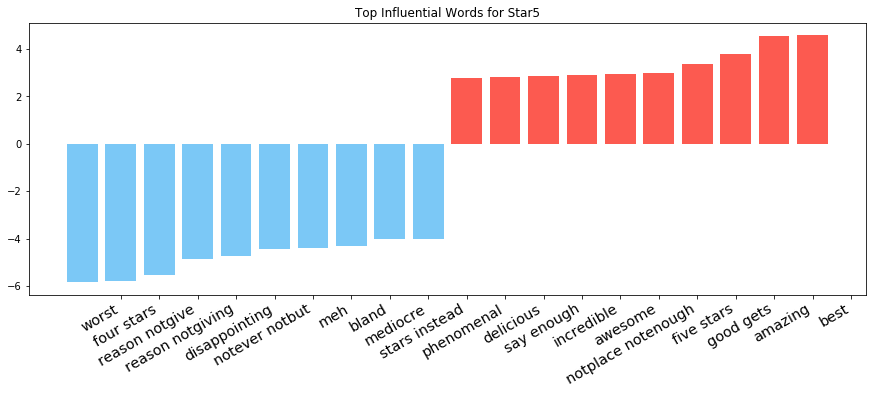

In [65]:
Image("svm_star5.png", height = 50, width = 450)

In the plot of star five, we can see the that reviews with highest star rate seem to contain only the compliment words like ‘amazing’, ‘awesome’, and ‘incredible’, which is quite the contrast with reviews in star one. From the comparison of  two star rates, we can see that the model efficiently distinguishes each star, therefore our model selection is quite reasonable.

Logistic Multinomial Model: We first apply the logistic multinomial regression based on lasso penalty on our sparse matrix with the dimension of 150 thousand samples and 714 features. However, the model just gives accuracy around 0.6.

Long-Short Term Memory Networks: Another try is long-short term memory networks. For the input layer, it’s our new text which is the merge of words and punctuations after the data cleaning. And the embedding layer, we map vectorized-text into a space with dimension 32. The layer is trained 5 times to have better weights for element in the space to minimize the global error of the network. Also, in LSTM layer, we choose 32 as the sample size we are going to use for each of the iteration in 1 epoch.  

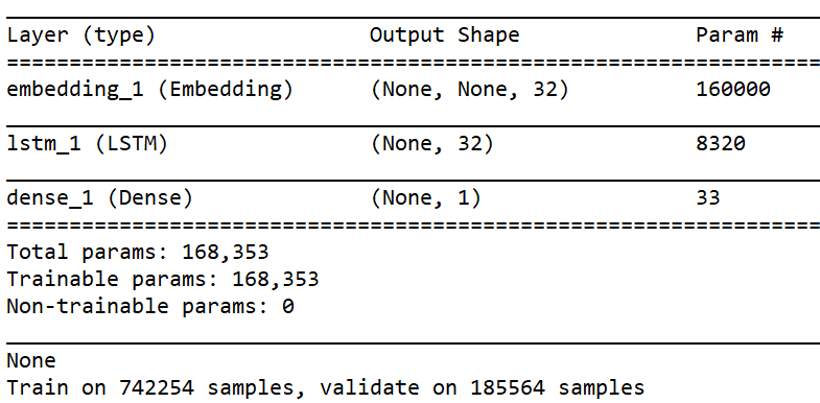

In [64]:
Image("lstm1.png", height = 100, width = 300)

The loss and validation loss which are based on mean square error are no larger than 0.5 for epochs after 2, but the final squared root of mean squared error for test set seems a little bit higher.

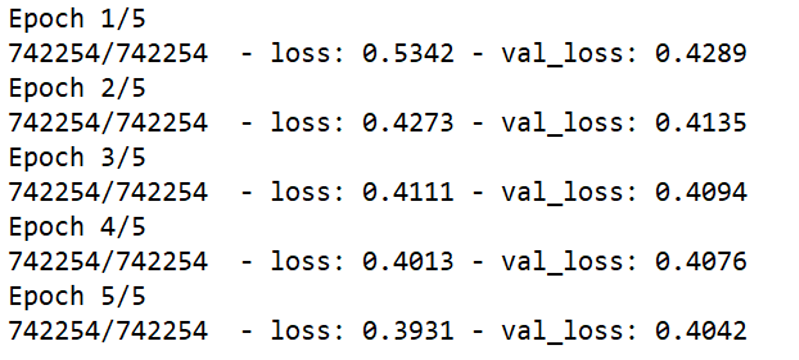

In [63]:
Image("lstm2.png", height = 100, width = 300)

### Part 7 Model diagnostics for SVM

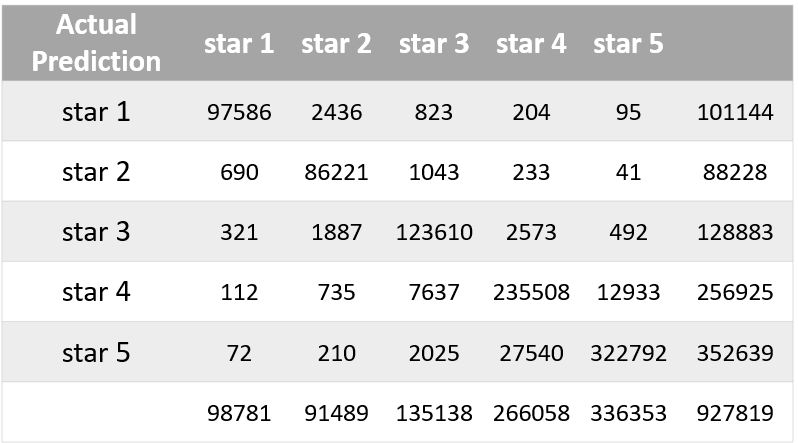

In [62]:
Image("svm1.png", height = 100, width = 300)

From the actual-prediction table for svm, we can see:
1. Star one and five both have number of predictions larger than actual counts, the svm model is more likely to predict boundary values.
2. Accuracies of predicting star one and five are higher than others, it indicates that the differences among reviews of star two, three and four are quite slight and hard to be detected by the model.
3. The model is very likely to mix star four and five, they have relatively the largest mis-labeled reviews.

### Part 8 Weakness and  strength
Weakness: For the long short memory networks, we then find the low accuracy for the prediction of test set may caused by the way we merge the text. Sequential information accounts for a large part for LSTM to learn the logic of natural language. The simply combination of cleaned words and punctuation breaks the relationship of words in original text.
Also, for the sparse matrix, we should give it more space for enlargement. The 150 thousands training data and 714 feature words seem not enough to build a well fitting model.
Strength: First, we did subtle data cleaning, for each of the remove and transformation, we will give it a second check of exemptions. Second, flexible feature selection. All counting methods and selection criterion are taken into consideration even some are not used in the model like tri-words, categories and location information. Third, diverse model application. Bunch of models are being evaluated and realized during the process. But thankfully, they all contribute to our final-result.

### Part 9 Conclusion
For the former part of analysis, we find that the main points that will influence the experience of customers are food, service and place which is interpreted as environment by us. Even a mistake of single part will large affect the ratings of the restuarant. 
After the model construction, the features to some degree decide the model fitting. The punctuations, unigrams, bigrams are proved to be effective in model fitting and contribute to the precise predictions of test data at last. 

### Part 10 Contribution
Shuyi Qu works on data pretreatment and slides preparation, Yiqiao Zhang works on feature selection procedure and result analysis, Xiawei Wang works on model plan and jupyter notebook.